In [1]:
import requests
import os
import json

# API base URL and token
BASE_URL = "https://renforce.esapro.it/api"
API_TOKEN = "2c23937283ed6125f52c4ba7399c7baebdfb3f051ac9272550847066011d7d5a83807bb0c3c807e2450fcb7fd4843d126badcf4c3f0ee52ca548b43db77e100e48becf05cb5e93529564055dd8a85d9beb089420a91eec2a022fbf8f984d9138a26afc5296e60aed14024c60ddcb95dff130b3f9fb7af13598a48dbc62348389"

# Plant code
PLANT_CODE = "P1130"
RESOLUTION=1

# Headers for authentication
HEADERS = {
    "X-API-Token": API_TOKEN
}

# Function to retrieve plant configurations
def get_plant_configurations(plant_code):
    """
    Retrieves the plant configurations from the API.

    Args:
        plant_code (str): The plant code.

    Returns:
        dict: The API response as a dictionary.
    """
    url = f"{BASE_URL}/{plant_code}/config"
    response = requests.get(url, headers=HEADERS)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Failed to retrieve configurations: {response.status_code}, {response.text}")

# Main execution
try:
    # Retrieve configurations
    configurations = get_plant_configurations(PLANT_CODE)

    # Print the response on the screen with better formatting
    print("\nAPI Response:")
    print("=" * 40)
    for config in configurations:
        for key, value in config.items():
            print(f"{key}: {value}")
        print("-" * 40)

    # Save the response to a file
    base_dir = "Data"
    os.makedirs(base_dir, exist_ok=True)
    file_path = os.path.join(base_dir, f"{PLANT_CODE}_configurations.json")
    with open(file_path, "w", encoding="utf-8") as file:
        json.dump(configurations, file, indent=4)
    print(f"\nConfigurations saved to: {file_path}")

    # Create a constant variable for the version
    VERSION = configurations[-1].get("v", "N/A")  # Assuming the version is in the first configuration
    print(f"\nVERSION constant created: {VERSION}")

except Exception as e:
    print("Error:", e)


API Response:
v: 1
t: 1980-01-01 00:00:00
----------------------------------------

Configurations saved to: Data/P1130_configurations.json

VERSION constant created: 1


In [2]:
import requests
import os
import csv


def get_sensors(plant_code, config_version, sensor_types=None):
    """
    Retrieves a list of sensors from a specific plant configuration.

    Args:
        plant_code (str): The plant code (e.g., "P1234").
        config_version (int): Configuration identifier.
        sensor_types (str or list, optional): Type(s) of sensors to filter (e.g., "AC_ACTIVE_ENERGY" or ["AC_ACTIVE_ENERGY", "MODULE_SOLAR_IRRADIANCE"]).

    Returns:
        list: Array of sensor objects.
    """
    url = f"{BASE_URL}/{plant_code}/sensors/{config_version}"
    params = {}
    if sensor_types:
        params["type"] = sensor_types if isinstance(sensor_types, str) else ",".join(sensor_types)
    
    try:
        response = requests.get(url, headers=HEADERS, params=params)
        if response.status_code == 200:
            return response.json()
        else:
            print("Response Status Code:", response.status_code)
            print("Response Text:", response.text)
            raise Exception(f"Failed to retrieve sensors: {response.status_code}, {response.text}")
    except requests.exceptions.RequestException as e:
        raise Exception(f"An error occurred while making the request: {e}")

def save_sensors_to_csv(plant_code, sensors):
    """
    Saves the sensors to a CSV file in the specified directory structure.

    Args:
        plant_code (str): The plant code.
        sensors (list): List of sensor objects.
    """
    # Define the directory structure
    base_dir = "Data"
    plant_dir = os.path.join(base_dir, plant_code)

    # Create directories if they don't exist
    os.makedirs(plant_dir, exist_ok=True)

    # Define the CSV file path
    csv_file_path = os.path.join(plant_dir, f"{plant_code}_sensors.csv")

    # Write sensors to the CSV file
    with open(csv_file_path, mode="w", newline="", encoding="utf-8") as csv_file:
        writer = csv.writer(csv_file)
        # Write the header
        writer.writerow(["ID", "Name", "Type", "Description", "OID", "Properties", "Source", "Visible", "Enabled"])
        # Write the data
        for sensor in sensors:
            writer.writerow([
                sensor.get("id", "N/A"),
                sensor.get("name", "N/A"),
                sensor.get("type", "N/A"),
                sensor.get("desc", "N/A"),
                sensor.get("oid", "N/A"),
                sensor.get("props", "N/A"),
                sensor.get("source", "N/A"),
                sensor.get("visible", "N/A"),
                sensor.get("enabled", "N/A")
            ])

    print(f"Sensors saved to: {csv_file_path}")

def print_sensors(sensors):
    """
    Prints the sensors nicely on the screen.

    Args:
        sensors (list): List of sensor objects.
    """
    print("\nSensors List:")
    for sensor in sensors:
        print(f"ID: {sensor.get('id', 'N/A')}")
        print(f"Name: {sensor.get('name', 'N/A')}")
        print(f"Type: {sensor.get('type', 'N/A')}")
        print(f"Description: {sensor.get('desc', 'N/A')}")
        print(f"OID: {sensor.get('oid', 'N/A')}")
        print(f"Properties: {sensor.get('props', 'N/A')}")
        print(f"Source: {sensor.get('source', 'N/A')}")
        print(f"Visible: {sensor.get('visible', 'N/A')}")
        print(f"Enabled: {sensor.get('enabled', 'N/A')}")
        print("-" * 40)  # Separator for readability

# Main execution
try:
    plant_code = PLANT_CODE  # Plant code
    config_version = VERSION       # Configuration version
    sensor_types = None      # Retrieve all sensor types

    # Retrieve sensors
    sensors = get_sensors(plant_code, config_version, sensor_types)
    print(len(sensors), "sensors found")
    # Print sensors nicely
    print_sensors(sensors)

    # Save sensors to CSV
    save_sensors_to_csv(plant_code, sensors)
except Exception as e:
    print("Error:", e)

3572 sensors found

Sensors List:
ID: 1
Name: Voltage L1
Type: VOLTAGE
Description: 
OID: 1.1.14:1
Properties: {'alarm_c': '5', 'alarm_debounce': '60', 'alarm_function': '', 'alarm_max_threshold': '0', 'alarm_min_threshold': '0', 'alarm_tdc': '60', 'alarm_tdo': '60', 'alarm_type': '', 'cast': 'U32', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'register': '3c552', 'sampling_period': '300'}
Source: sundra
Visible: True
Enabled: True
----------------------------------------
ID: 10
Name: Temperature
Type: TEMPERATURE
Description: 
OID: 1.1.1.1:10
Properties: {'alarm_c': '3', 'alarm_debounce': '300', 'alarm_function': 'LIMITALARM', 'alarm_max_threshold': '70', 'alarm_min_threshold': '-10', 'alarm_tdc': '300', 'alarm_tdo': '300', 'alarm_type': '52', 'c_high_pass': '', 'c_low_pass': '', 'cast': 'U16', 'copy_to': '', 'data_age_lmt': '0', 'endian': 'BE', 'is_raw': '1', 'limit_max': '', 'limit_min': '', 'mask': '', 'mask_value': '1', 'register': '31064', 'sampling_period': '

In [3]:
import pandas as pd
from datetime import datetime, timedelta
import requests
import time

# Path to the sensors file
SENSORS_FILE = f"Data/{PLANT_CODE}/{PLANT_CODE}_sensors.csv"

# Step 1: Load the sensors file
try:
    sensors_metadata = pd.read_csv(SENSORS_FILE)
except FileNotFoundError:
    print(f"File not found: {SENSORS_FILE}")
    exit()

# Step 2: Find the sensor with the name "Energia Prodotta" or "Energy AC DELTA"
if "Name" not in sensors_metadata.columns:
    print("The 'Name' column is missing in the sensors metadata.")
    exit()

sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energia Prodotta", case=False, na=False)]
if sensor_row.empty:
    sensor_row = sensors_metadata[sensors_metadata["Name"].str.contains("Energy AC DELTA", case=False, na=False)]
    if sensor_row.empty:
        print("Sensor with the name 'Energia Prodotta' or 'Energy AC DELTA' not found.")
        exit()

sensor_id = sensor_row.iloc[0]["ID"]
print(f"Sensor ID for the found sensor: {sensor_id}")

# Step 3: Retrieve data for the sensor
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
end_date = datetime.now().replace(minute=0, second=0, microsecond=0)  # Round down to the nearest full hour
max_interval = timedelta(days=92)  # Maximum allowed interval (92 days)
no_data_threshold = timedelta(days=365)  # Stop if no data is returned for more than 1 year

current_end = end_date
last_reading = None
no_data_duration = timedelta(0)

while no_data_duration < no_data_threshold:
    current_start = current_end - max_interval
    payload = {
        "from": current_start.strftime("%Y-%m-%d %H:%M:%S"),
        "to": current_end.strftime("%Y-%m-%d %H:%M:%S"),
        "sensors": [sensor_id],
        "resolution": RESOLUTION
    }

    # Make the POST request to the API
    response = requests.post(TREND_URL, headers=HEADERS, json=payload)

    if response.status_code == 200:
        try:
            data = response.json()
        except ValueError:
            print("Failed to parse JSON response.")
            break

        # Check if data is returned for the sensor
        if str(sensor_id) in data and data[str(sensor_id)]:
            sensor_data = data[str(sensor_id)]
            sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
            sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime

            # Update the last reading to the minimum timestamp in this range
            last_reading = sensor_df["timestamp"].min()

            print(f"Data retrieved for range {current_start} to {current_end}.")
            no_data_duration = timedelta(0)  # Reset no data duration
            del sensor_df  # Clear memory
        else:
            print(f"No data for sensor {sensor_id} in range {current_start} to {current_end}.")
            no_data_duration += max_interval  # Increment no data duration
    else:
        print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
        print("Response:", response.text)
        break

    # Move to the previous time range
    current_end = current_start - timedelta(seconds=1)
    time.sleep(1)  # Avoid hitting API rate limits

# Step 4: Save the last reading going backward
if last_reading:
    last_day = last_reading.date()
    print(f"The last day of data for the sensor going backward is: {last_day}")
else:
    print("No data found for the sensor.")

Sensor ID for the found sensor: 156
Data retrieved for range 2025-03-24 00:00:00 to 2025-06-24 00:00:00.
Data retrieved for range 2024-12-21 23:59:59 to 2025-03-23 23:59:59.
Data retrieved for range 2024-09-20 23:59:58 to 2024-12-21 23:59:58.
Data retrieved for range 2024-06-20 23:59:57 to 2024-09-20 23:59:57.
Data retrieved for range 2024-03-20 23:59:56 to 2024-06-20 23:59:56.
Data retrieved for range 2023-12-19 23:59:55 to 2024-03-20 23:59:55.
Data retrieved for range 2023-09-18 23:59:54 to 2023-12-19 23:59:54.
Data retrieved for range 2023-06-18 23:59:53 to 2023-09-18 23:59:53.
Data retrieved for range 2023-03-18 23:59:52 to 2023-06-18 23:59:52.
Data retrieved for range 2022-12-16 23:59:51 to 2023-03-18 23:59:51.
Data retrieved for range 2022-09-15 23:59:50 to 2022-12-16 23:59:50.
Data retrieved for range 2022-06-15 23:59:49 to 2022-09-15 23:59:49.
Data retrieved for range 2022-03-15 23:59:48 to 2022-06-15 23:59:48.
No data for sensor 156 in range 2021-12-13 23:59:47 to 2022-03-15 2

In [4]:
import requests
import pandas as pd
import time
import os
from datetime import datetime, timedelta

# API endpoint URLs
TREND_URL = f"{BASE_URL}/{PLANT_CODE}/data/trend/"
SENSORS_URL = f"{BASE_URL}/{PLANT_CODE}/sensors/{config_version}"

# Define the specific sensors to process
sensor_ids = ["timestamp", "D.171.ISIRR", "172", "D.156.DELTA","156"]

# Define the file path
file_path = f"data_{PLANT_CODE}_{RESOLUTION}.csv"

# Check if the file exists and has content
if os.path.exists(file_path) and os.path.getsize(file_path) > 0:
    print(f"File '{file_path}' exists and is not empty. Loading data into df.")
    df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col="timestamp")

    # Check the last reading in the file
    last_reading = df.index.max()
    print(f"Last reading in the file: {last_reading}")

    # Define the current time minus 1 hour
    current_time_minus_1h = datetime.now() - timedelta(hours=1)

    # If the last reading is earlier than current_time_minus_1h, fetch missing data
    if last_reading < current_time_minus_1h:
        print(f"Fetching missing data from {last_reading + timedelta(seconds=1)} to {current_time_minus_1h}.")

        # Define the start and end dates for the missing period
        start_date = last_reading + timedelta(seconds=1)
        end_date = current_time_minus_1h

        max_interval = timedelta(days=92)  # Maximum interval for resolution 0

        # Split the time range into chunks of the maximum interval
        time_ranges = []
        current_start = start_date
        while current_start < end_date:
            current_end = min(current_start + max_interval, end_date)
            time_ranges.append((current_start, current_end))
            current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

        # Initialize a list to store all sensor data
        all_data = []

        # Loop through each time range
        for time_idx, (start_time, end_time) in enumerate(time_ranges):
            print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
            payload = {
                "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
                "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
                "sensors": sensor_ids,
                "resolution": RESOLUTION  # Use the selected resolution
            }

            # Make the POST request to the API
            response = requests.post(TREND_URL, headers=HEADERS, json=payload)

            if response.status_code == 200:
                # Parse the JSON response
                data = response.json()

                # Transform the data into a long-format DataFrame
                for sensor_id, sensor_data in data.items():
                    if not sensor_data:
                        print(f"No data returned for sensor: {sensor_id}")
                        continue
                    sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
                    sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
                    sensor_df["sensor_id"] = sensor_id  # Add a column to identify the sensor
                    all_data.append(sensor_df)  # Append to the list of all data
            else:
                print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
                print("Response:", response.text)

            # Respect the API rate limit (no more than 5 calls per minute)
            time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

        if all_data:
            long_df = pd.concat(all_data, ignore_index=True)

            # Pivot the long-format DataFrame to wide format
            new_data = long_df.pivot(index="timestamp", columns="sensor_id", values="value")

            # Flatten the multi-level column index (if it exists)
            if isinstance(new_data.columns, pd.MultiIndex):  # Check if columns are multi-level
                new_data.columns = new_data.columns.get_level_values(0)  # Flatten multi-level columns

            # Ensure 'timestamp' is the index
            new_data.index.name = "timestamp"  # Explicitly name the index as 'timestamp'

            # Append the new data to the existing DataFrame
            df = pd.concat([df, new_data])

            # Save the updated DataFrame back to the CSV file
            df.to_csv(file_path, index=True)  # Save with the index

            print(f"Missing data added to '{file_path}'.")
        else:
            print("No new data fetched from the API.")
else:
    print(f"File '{file_path}' does not exist or is empty. Initializing with historical data.")

    # Initialize the DataFrame with historical data
    start_date = datetime(2022, 3, 18, 0, 0, 0)  # Default start date
    end_date = datetime.now() - timedelta(hours=1)  # Current time minus 1 hour

    max_interval = timedelta(days=92)  # Maximum interval for resolution 0

    # Split the time range into chunks of the maximum interval
    time_ranges = []
    current_start = start_date
    while current_start < end_date:
        current_end = min(current_start + max_interval, end_date)
        time_ranges.append((current_start, current_end))
        current_start = current_end + timedelta(seconds=1)  # Avoid overlapping intervals

    # Initialize a list to store all sensor data
    all_data = []

    # Loop through each time range
    for time_idx, (start_time, end_time) in enumerate(time_ranges):
        print(f"Processing time range {time_idx + 1}: {start_time} to {end_time}")
        payload = {
            "from": start_time.strftime("%Y-%m-%d %H:%M:%S"),
            "to": end_time.strftime("%Y-%m-%d %H:%M:%S"),
            "sensors": sensor_ids,
            "resolution": RESOLUTION  # Use the selected resolution
        }

        # Make the POST request to the API
        response = requests.post(TREND_URL, headers=HEADERS, json=payload)

        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()

            # Transform the data into a long-format DataFrame
            for sensor_id, sensor_data in data.items():
                if not sensor_data:
                    print(f"No data returned for sensor: {sensor_id}")
                    continue
                sensor_df = pd.DataFrame(sensor_data, columns=["timestamp", "value"])
                sensor_df["timestamp"] = pd.to_datetime(sensor_df["timestamp"])  # Ensure timestamp is datetime
                sensor_df["sensor_id"] = sensor_id  # Add a column to identify the sensor
                all_data.append(sensor_df)  # Append to the list of all data
        else:
            print(f"Failed to fetch trend data. HTTP Status Code: {response.status_code}")
            print("Response:", response.text)

        # Respect the API rate limit (no more than 5 calls per minute)
        time.sleep(12)  # Wait 12 seconds between calls to stay under the limit

    if all_data:
        long_df = pd.concat(all_data, ignore_index=True)

        # Pivot the long-format DataFrame to wide format
        df = long_df.pivot(index="timestamp", columns="sensor_id", values="value")

        # Flatten the multi-level column index (if it exists)
        if isinstance(df.columns, pd.MultiIndex):  # Check if columns are multi-level
            df.columns = df.columns.get_level_values(0)  # Flatten multi-level columns

        # Ensure 'timestamp' is the index
        df.index.name = "timestamp"  # Explicitly name the index as 'timestamp'

        # Save the cleaned DataFrame back to the CSV file
        df.to_csv(file_path, index=True)  # Save with the index

        print(f"File '{file_path}' initialized with historical data.")
    else:
        print("No data fetched from the API. Initializing an empty DataFrame.")
        df = pd.DataFrame()

# Reload the DataFrame to verify the structure
try:
    df = pd.read_csv(file_path, parse_dates=["timestamp"], index_col="timestamp")

    # Remove the name from the index
    df.index.name = None  # Remove the name of the index

    # Display the cleaned DataFrame
    print("Cleaned DataFrame:")
    print(df.head())
except FileNotFoundError:
    print(f"File '{file_path}' still does not exist. Please check the initialization process.")
except ValueError as e:
    print(f"Error loading CSV: {e}")
    print("CSV content might be missing the 'timestamp' column. Please check the file.")

File 'data_P1130_1.csv' exists and is not empty. Loading data into df.
Last reading in the file: 2025-06-23 19:00:00
Fetching missing data from 2025-06-23 19:00:01 to 2025-06-23 23:09:30.595552.
Processing time range 1: 2025-06-23 19:00:01 to 2025-06-23 23:09:30.595552
Missing data added to 'data_P1130_1.csv'.
Cleaned DataFrame:
                            156    172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00  47487776.0  3.226        440.0      675.620
2022-03-18 08:00:00  47491120.0  4.607       3344.0      836.143
2022-03-18 09:00:00  47494692.0  5.690       3572.0      939.744
2022-03-18 10:00:00  47498144.0  6.827       3452.0      972.460
2022-03-18 11:00:00  47501184.0  7.632       3040.0      792.876


In [5]:
import requests
import pandas as pd
from datetime import datetime

# Define the API endpoints and parameters
basic_url = "https://my.meteoblue.com/packages/basic-1h"
pvpro_url = "https://my.meteoblue.com/packages/pvpro-1h"

# Common parameters
params_basic = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 4,  # Number of historical days
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

params_pvpro = {
    "lat": 44.791225,  # Latitude
    "lon": 27.50663,  # Longitude
    "format": "json",  # JSON format
    "timeformat": "timestamp_utc",  # Time format in UTC (GMT)
    "forecast_days": 2,  # Number of forecast days
    "history_days": 4,  # Number of historical days
    "kwp": 5,  # Kilowatt peak (nominal power of the PV system)
    "slope": 30,  # Tilt angle of the PV panels (in degrees)
    "facing": 180,  # Orientation of the PV panels (e.g., 180° for south-facing)
    "apikey": "BxCsIi1U6N8SoM3w"  # Your API key
}

# Make the API calls
response_basic = requests.get(basic_url, params=params_basic)
response_pvpro = requests.get(pvpro_url, params=params_pvpro)

# Check the responses and process the data
if response_basic.status_code == 200 and response_pvpro.status_code == 200:
    # Parse the JSON responses
    data_basic = response_basic.json()
    data_pvpro = response_pvpro.json()
    
    # Extract relevant data into DataFrames
    if "data_1h" in data_basic and "time" in data_basic["data_1h"]:
        df_basic = pd.DataFrame({
            "time_utc": pd.to_datetime(data_basic["data_1h"]["time"], unit='s', utc=True),  # UTC time
            "temperature": data_basic["data_1h"]["temperature"],  # Temperature
        })
    else:
        print("Required data fields are missing in the basic-1h response.")
        df_basic = pd.DataFrame()

    if "data_1h" in data_pvpro and "time" in data_pvpro["data_1h"] and "gti_instant" in data_pvpro["data_1h"]:
        df_pvpro = pd.DataFrame({
            "time_utc": pd.to_datetime(data_pvpro["data_1h"]["time"], unit='s', utc=True),  # UTC time
            "gti_instant": data_pvpro["data_1h"]["gti_instant"]  # GTI Instantaneous
        })
    else:
        print("Required data fields are missing in the pvpro-1h response.")
        df_pvpro = pd.DataFrame()

    # Merge the two DataFrames on time_utc
    if not df_basic.empty and not df_pvpro.empty:
        solar_data_combined = pd.merge(df_basic, df_pvpro, on="time_utc", how="inner")
        
        # Convert time_utc to datetime index with the desired format and no name
        solar_data_combined.set_index("time_utc", inplace=True)
        solar_data_combined.index = solar_data_combined.index.tz_convert(None)  # Remove timezone info
        solar_data_combined.index.name = None  # Remove the name of the index

        print("Combined DataFrame with Historical and Forecast Solar Data:")
        print(solar_data_combined.head(30))
        
        # Append the combined DataFrame to the existing CSV file
        try:
            existing_data = pd.read_csv("solar_data_combined.csv", index_col=0, parse_dates=True)
            updated_data = pd.concat([existing_data, solar_data_combined]).drop_duplicates()
            updated_data.to_csv("solar_data_combined.csv", index=True)
            print("Data appended to 'solar_data_combined.csv'.")
        except FileNotFoundError:
            # If the file does not exist, create it
            solar_data_combined.to_csv("solar_data_combined.csv", index=True)
            print("Data saved to 'solar_data_combined.csv'.")

        # Save the forecast history to a separate CSV file
        forecast_history = solar_data_combined.loc[solar_data_combined.index >= datetime.now()]
        try:
            existing_forecast = pd.read_csv("forecast_history.csv", index_col=0, parse_dates=True)
            updated_forecast = pd.concat([existing_forecast, forecast_history]).drop_duplicates()
            updated_forecast.to_csv("forecast_history.csv", index=True)
            print("Forecast history appended to 'forecast_history.csv'.")
        except FileNotFoundError:
            forecast_history.to_csv("forecast_history.csv", index=True)
            print("Forecast history saved to 'forecast_history.csv'.")
    else:
        print("One or both DataFrames are empty. Cannot combine.")
else:
    print(f"Failed to fetch data. HTTP Status Codes: basic-1h={response_basic.status_code}, pvpro-1h={response_pvpro.status_code}")
    print(f"Response basic-1h: {response_basic.text}")
    print(f"Response pvpro-1h: {response_pvpro.text}")

Combined DataFrame with Historical and Forecast Solar Data:
                     temperature  gti_instant
2025-06-19 21:00:00        23.00         0.00
2025-06-19 22:00:00        22.07         0.00
2025-06-19 23:00:00        21.80         0.00
2025-06-20 00:00:00        22.00         0.00
2025-06-20 01:00:00        21.57         0.00
2025-06-20 02:00:00        20.60         0.00
2025-06-20 03:00:00        19.40         5.64
2025-06-20 04:00:00        18.97        40.00
2025-06-20 05:00:00        19.27       216.52
2025-06-20 06:00:00        20.00       368.53
2025-06-20 07:00:00        20.77       497.31
2025-06-20 08:00:00        21.03       499.50
2025-06-20 09:00:00        21.20       445.06
2025-06-20 10:00:00        20.97       374.62
2025-06-20 11:00:00        20.83       233.54
2025-06-20 12:00:00        20.93       196.73
2025-06-20 13:00:00        21.23       177.94
2025-06-20 14:00:00        21.80       251.35
2025-06-20 15:00:00        22.13       132.88
2025-06-20 16:00:00 

In [6]:
import pandas as pd

# Ensure both DataFrames have their indexes in datetime format
df.index = pd.to_datetime(df.index)
solar_data_combined.index = pd.to_datetime(solar_data_combined.index)

# Find matching indexes between df and solar_data_combined
matching_indexes = df.index.intersection(solar_data_combined.index)

# Filter both DataFrames to include only matching indexes
df_matching = df.loc[matching_indexes]
solar_data_combined_matching = solar_data_combined.loc[matching_indexes]

# Calculate scaling factors
scaling_factor_temperature = df_matching["172"].mean() / solar_data_combined_matching["temperature"].mean()
scaling_factor_gti_instant = df_matching["D.171.ISIRR"].mean() / solar_data_combined_matching["gti_instant"].mean()

# Apply scaling factors to solar_data_combined
solar_data_combined["172"] = solar_data_combined["temperature"] * scaling_factor_temperature
solar_data_combined["D.171.ISIRR"] = solar_data_combined["gti_instant"] * scaling_factor_gti_instant

# Create a new DataFrame with scaled columns
new_df = solar_data_combined[["172", "D.171.ISIRR"]].copy()

# Display scaling factors and the new DataFrame
print(f"Scaling factor for 'temperature': {scaling_factor_temperature:.4f}")
print(f"Scaling factor for 'gti_instant': {scaling_factor_gti_instant:.4f}")
print("\nNew DataFrame with scaled values:")
print(new_df.head())

Scaling factor for 'temperature': 1.1674
Scaling factor for 'gti_instant': 0.9659

New DataFrame with scaled values:
                           172  D.171.ISIRR
2025-06-19 21:00:00  26.850485          0.0
2025-06-19 22:00:00  25.764791          0.0
2025-06-19 23:00:00  25.449590          0.0
2025-06-20 00:00:00  25.683072          0.0
2025-06-20 01:00:00  25.181085          0.0


In [7]:

# Create a copy of df to preserve the original
df_updated = df.copy()

# Overwrite values in df_updated with values from new_df where indexes and columns match
df_updated.update(new_df)

# Append rows from new_df that do not exist in df
extra_rows = new_df.loc[new_df.index.difference(df.index)]
df_updated = pd.concat([df_updated, extra_rows], axis=0)

# Sort the index to maintain chronological order
df_updated.sort_index(inplace=True)

# Display the updated DataFrame
print("Updated df with overwritten values and extra rows from new_df:")
print(df_updated.head())

Updated df with overwritten values and extra rows from new_df:
                            156    172  D.156.DELTA  D.171.ISIRR
2022-03-18 07:00:00  47487776.0  3.226        440.0      675.620
2022-03-18 08:00:00  47491120.0  4.607       3344.0      836.143
2022-03-18 09:00:00  47494692.0  5.690       3572.0      939.744
2022-03-18 10:00:00  47498144.0  6.827       3452.0      972.460
2022-03-18 11:00:00  47501184.0  7.632       3040.0      792.876


In [8]:
df_updated.tail(50)

,156,172,D.156.DELTA,D.171.ISIRR
2025-06-23 20:00:00,65565648.0,27.550932,0.0,0.000000
2025-06-23 21:00:00,NaN,25.542983,NaN,0.000000
2025-06-23 22:00:00,NaN,24.130414,NaN,0.000000
2025-06-23 23:00:00,NaN,22.892957,NaN,0.000000
2025-06-24 00:00:00,NaN,21.713870,NaN,0.000000
2025-06-24 01:00:00,NaN,20.651525,NaN,0.000000
2025-06-24 02:00:00,NaN,19.752618,NaN,0.000000
2025-06-24 03:00:00,NaN,19.892707,NaN,16.245859
2025-06-24 04:00:00,NaN,21.924005,NaN,87.488106
2025-06-24 05:00:00,NaN,25.706421,NaN,248.208143


/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_1298/2079189005.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = y.fillna(method="ffill")  # Forward fill missing values
/var/folders/f5/zvp8h0wn4d50th4gw1czk38m0000gn/T/ipykernel_1298/2079189005.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill")  # Forward fill missing values
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39862D+00    |proj g|=  1.00621D-01


 This problem is unconstrained.



At iterate    5    f=  6.36337D+00    |proj g|=  7.52110D-02

At iterate   10    f=  6.35220D+00    |proj g|=  3.69021D-01
  ys=-1.357E-01  -gs= 4.667E-03 BFGS update SKIPPED

At iterate   15    f=  6.33842D+00    |proj g|=  3.79235D-02

At iterate   20    f=  6.33814D+00    |proj g|=  1.04678D-01

At iterate   25    f=  6.33810D+00    |proj g|=  3.18943D-02

At iterate   30    f=  6.33782D+00    |proj g|=  2.49266D-02

At iterate   35    f=  6.33553D+00    |proj g|=  4.71213D-01

At iterate   40    f=  6.27866D+00    |proj g|=  1.65292D-01

At iterate   45    f=  6.26901D+00    |proj g|=  4.71513D-02

At iterate   50    f=  6.26807D+00    |proj g|=  1.74925D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluation Metrics for Testing Period:
Mean Absolute Error (MAE): 119.98
Mean Squared Error (MSE): 35277.12
Root Mean Squared Error (RMSE): 187.82

Daily Accuracy Based on Full Day:
Accuracy Percentage: 93.82%


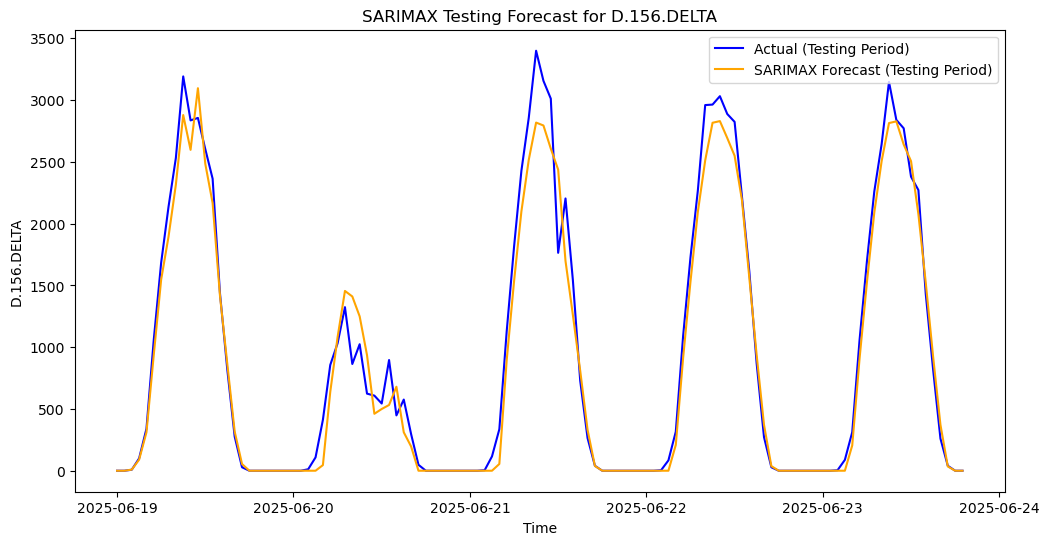


Total Energy Forecasted vs Actual for Each Day (Testing Period):
Actual Daily Sum:
2025-06-19    24272.0
2025-06-20     9672.0
2025-06-21    24792.0
2025-06-22    25164.0
2025-06-23    24028.0
Freq: D, Name: D.156.DELTA, dtype: float64
Forecasted Daily Sum:
2025-06-19    22984.356595
2025-06-20     9496.371617
2025-06-21    21892.435819
2025-06-22    23249.374290
2025-06-23    22954.563355
Freq: D, Name: predicted_mean, dtype: float64

Forecast for 2025-06-23:
2025-06-24 00:00:00       0.000000
2025-06-24 01:00:00       0.000000
2025-06-24 02:00:00       0.000000
2025-06-24 03:00:00       8.283788
2025-06-24 04:00:00     200.231688
2025-06-24 05:00:00     773.954161
2025-06-24 06:00:00    1379.977397
2025-06-24 07:00:00    1987.663170
2025-06-24 08:00:00    2411.701688
2025-06-24 09:00:00    2758.145698
2025-06-24 10:00:00    2779.331350
2025-06-24 11:00:00    2591.419689
2025-06-24 12:00:00    2540.538515
2025-06-24 13:00:00    2212.788470
2025-06-24 14:00:00    1573.868633
2025-06-2

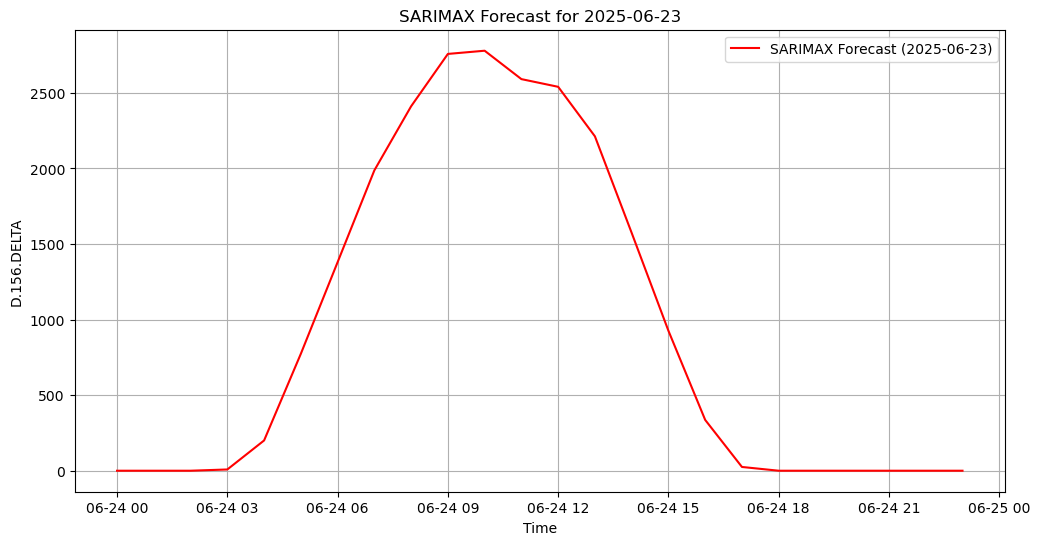

In [9]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure the index is in datetime format
df_updated.index = pd.to_datetime(df_updated.index)

# Define the target variable and exogenous variables
target_variable = "D.156.DELTA"
exogenous_variables = ["172", "D.171.ISIRR"]

# Prepare the data
y = df_updated[target_variable]  # Target variable
X = df_updated[exogenous_variables]  # Exogenous variables

# Handle missing values (fill or drop)
y = y.fillna(method="ffill")  # Forward fill missing values
X = X.fillna(method="ffill")  # Forward fill missing values

# Split the data into training, testing, and forecasting sets
train_end = pd.Timestamp("2025-06-19 23:59:59")  # Training ends before testing starts
test_start = pd.Timestamp("2025-06-19 00:00:00")  # Testing starts
test_end = pd.Timestamp("2025-06-23 19:00:00")  # Testing ends
forecast_start = pd.Timestamp("2025-06-24 00:00:00")  # Forecasting starts
forecast_end = pd.Timestamp("2025-06-24 23:59:59")  # Forecasting ends

# Training data
y_train = y[:train_end]  # Training data
X_train = X[:train_end]  # Exogenous variables for training

# Testing data
y_test = y[test_start:test_end]
X_test = X[test_start:test_end]

# Forecasting data
X_forecast = X[forecast_start:forecast_end]

# Fit the SARIMAX model on the training data
sarimax_model = SARIMAX(
    y_train,
    exog=X_train,  # Include exogenous variables
    order=(1, 1, 1),  # ARIMA order (p, d, q)
    seasonal_order=(1, 1, 1, 24),  # Seasonal order (P, D, Q, s) for daily seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_result = sarimax_model.fit()

# Forecast the testing period (2025-06-18 to 2025-06-22)
forecast_test = sarimax_result.get_forecast(steps=len(X_test), exog=X_test).predicted_mean
forecast_test.index = y_test.index  # Align forecast index with actual data

# Ground predictions to 0 where irradiance is <4 during the testing period
forecast_test.loc[X_test["D.171.ISIRR"] < 4] = 0

# Ensure no negative values in the forecast
forecast_test[forecast_test < 0] = 0

# Compute evaluation metrics for the testing period
mae = mean_absolute_error(y_test, forecast_test)
mse = mean_squared_error(y_test, forecast_test)
rmse = np.sqrt(mse)

# Compute daily sums for actual and forecasted values (testing period)
y_test_daily_sum = y_test.resample('D').sum()
forecast_test_daily_sum = forecast_test.resample('D').sum()

# Calculate daily accuracy based on the full day
daily_difference = np.abs(y_test_daily_sum - forecast_test_daily_sum)
daily_accuracy = 100 - (daily_difference / y_test_daily_sum * 100).mean()

# Display metrics
print("Evaluation Metrics for Testing Period:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("\nDaily Accuracy Based on Full Day:")
print(f"Accuracy Percentage: {daily_accuracy:.2f}%")

# Plot the testing forecast and actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual (Testing Period)", color="blue")
plt.plot(forecast_test, label="SARIMAX Forecast (Testing Period)", color="orange")
plt.title("SARIMAX Testing Forecast for D.156.DELTA")
plt.xlabel("Time")
plt.ylabel("D.156.DELTA")
plt.legend()
plt.show()

# Display daily sums for testing
print("\nTotal Energy Forecasted vs Actual for Each Day (Testing Period):")
print("Actual Daily Sum:")
print(y_test_daily_sum)
print("Forecasted Daily Sum:")
print(forecast_test_daily_sum)

# Forecast the next day (2025-06-23)
forecast_future = sarimax_result.get_forecast(steps=len(X_forecast), exog=X_forecast).predicted_mean
forecast_future.index = X_forecast.index  # Align forecast index with future timestamps

# Ensure no negative values in the forecast
forecast_future[forecast_future < 0] = 0

# Calculate the total forecast for 2025-06-23
total_forecast_2025_06_23 = forecast_future.sum()

# Display the forecast for the next day
print("\nForecast for 2025-06-23:")
print(forecast_future)
print(f"\nTotal Forecast for 2025-06-23 (D.156.DELTA): {total_forecast_2025_06_23:.2f}")

# Plot the forecast for the next day
plt.figure(figsize=(12, 6))
plt.plot(forecast_future, label="SARIMAX Forecast (2025-06-23)", color="red")
plt.title("SARIMAX Forecast for 2025-06-23")
plt.xlabel("Time")
plt.ylabel("D.156.DELTA")
plt.legend()
plt.grid()
plt.show()